# Analisis con diferentes modelos:

OBJETIVO:
Una empresa internacional de comercio electrónico quiere descubrir información clave de su base de datos de clientes. Quieren utilizar algunas de las técnicas de aprendizaje automático para estudiar a sus clientes. La empresa vende productos electrónicos. Aquí nuestro objetivo es predecir si el pedido se entregó a tiempo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv('envios_productos.csv', sep = ';')

In [34]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Los datos contienen la siguiente información: 
* ID: Número de ID de los Clientes. 
* Bloque de almacén: la empresa tiene un gran almacén que se divide en bloques como A, B, C, D, E. 
* Modo de envío: la empresa envía los productos de varias maneras, como barco, vuelo y carretera. 
* Llamadas de atención al cliente: Número de llamadas realizadas a partir de consulta por consulta del envío. * * * * Calificación del cliente: La empresa ha calificado a cada cliente. 1 es el más bajo (peor), 5 es el más alto (mejor). 
* Costo del producto: Costo del Producto en dólares estadounidenses. 
* Compras anteriores: El Número de Compras Previas. Importancia del producto: la empresa ha categorizado el producto en varios parámetros, como bajo, medio, alto. 
* Género: Masculino y Femenino. 
* Descuento ofrecido: Descuento ofrecido en ese producto específico. 
* Peso en gms: Es el peso en gramos. 
* Llegó a tiempo: Es la variable objetivo, donde 1 Indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.

In [4]:
objetivo = data['Reached.on.Time_Y.N']

La ID no parece tener ninguna importancia, por lo que podríamos eliminar fácilmente esas columnas. Tambien quitaremos la variable objetivo

In [5]:
data.drop(['ID','Reached.on.Time_Y.N'],axis=1,inplace=True)

In [6]:
data.info() #para ver informacion de las variables(columnas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.4+ KB


NO hay faltante de valores en ninguna columna de los datos.

### Informacion numerica

In [7]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


### Informacion categorica

In [8]:
data.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


### Warehouse_block

/Users/julian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


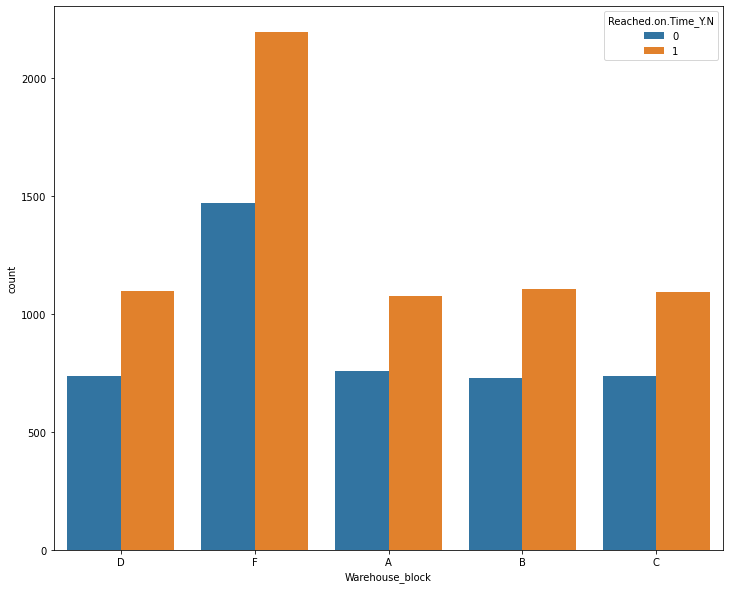

In [9]:
plt.figure(figsize=(12,10))
sns.countplot(data.Warehouse_block,hue=objetivo)
plt.show()

In [10]:
data.Warehouse_block=pd.Categorical(data.Warehouse_block,categories=['A','B','C','D','F'],ordered=True).codes
#retorna una matriz de números enteros que son las posiciones de los valores reales en la matriz de categorías
#nos sirve para usar en los modelos

### Mode of shipment

/Users/julian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


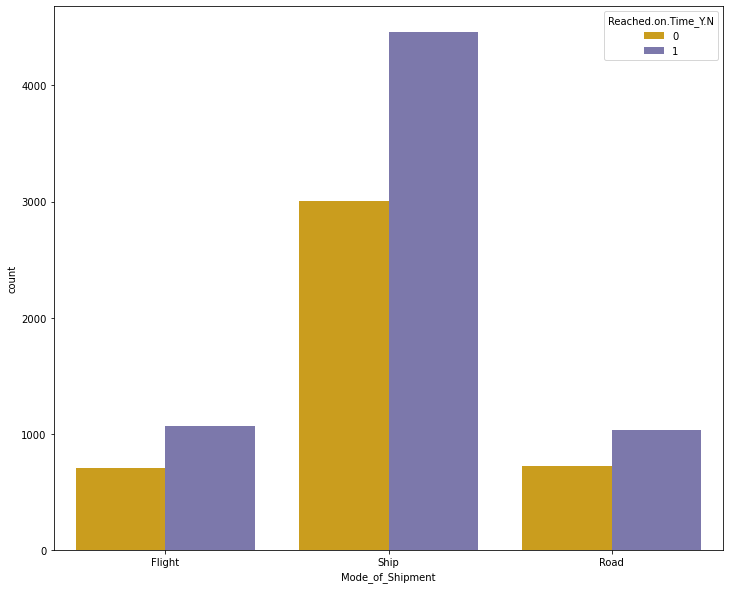

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(data.Mode_of_Shipment,hue=objetivo,palette='Dark2_r')
plt.show()

In [12]:
data.Mode_of_Shipment=pd.Categorical(data.Mode_of_Shipment,categories=['Ship','Flight','Road'],ordered=True).codes

### Importance Product

/Users/julian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


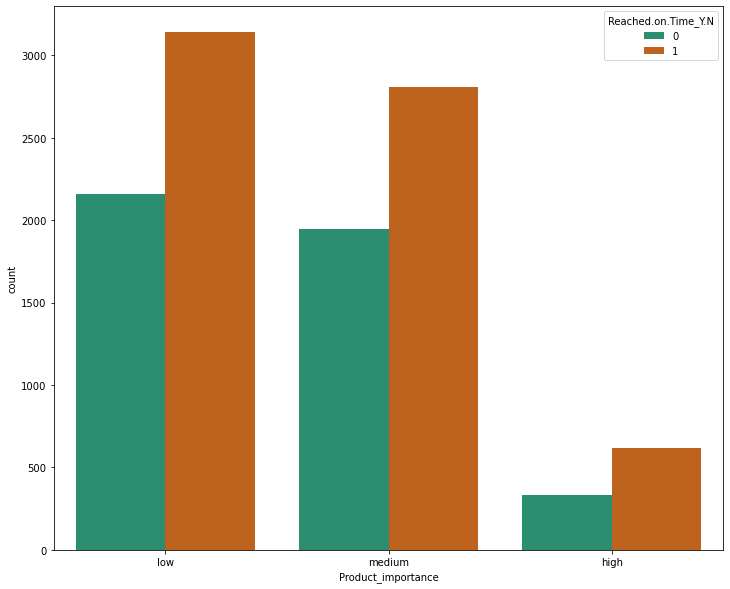

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(data.Product_importance,hue=objetivo,palette='Dark2')
plt.show()

In [14]:
data.Product_importance=pd.Categorical(data.Product_importance,categories=['low','medium','High'],ordered=True).codes

### Gender

In [15]:
data.Gender.value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

/Users/julian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


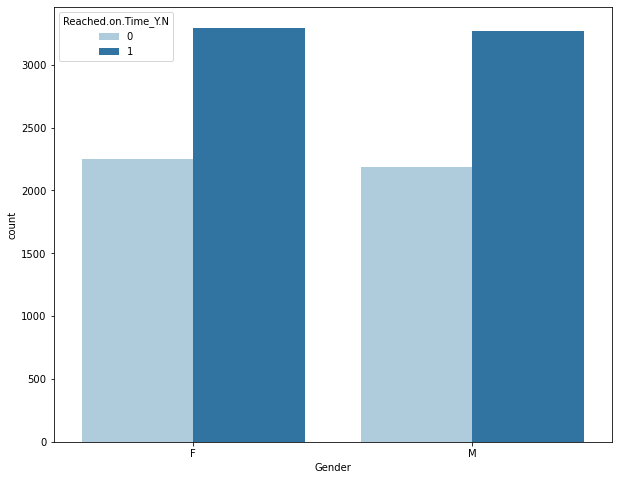

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data.Gender,hue=objetivo,palette='Paired')
plt.show()

In [17]:
data.Gender=pd.Categorical(data.Gender,categories=['M','F'],ordered=True).codes

## Analisis Multivariado

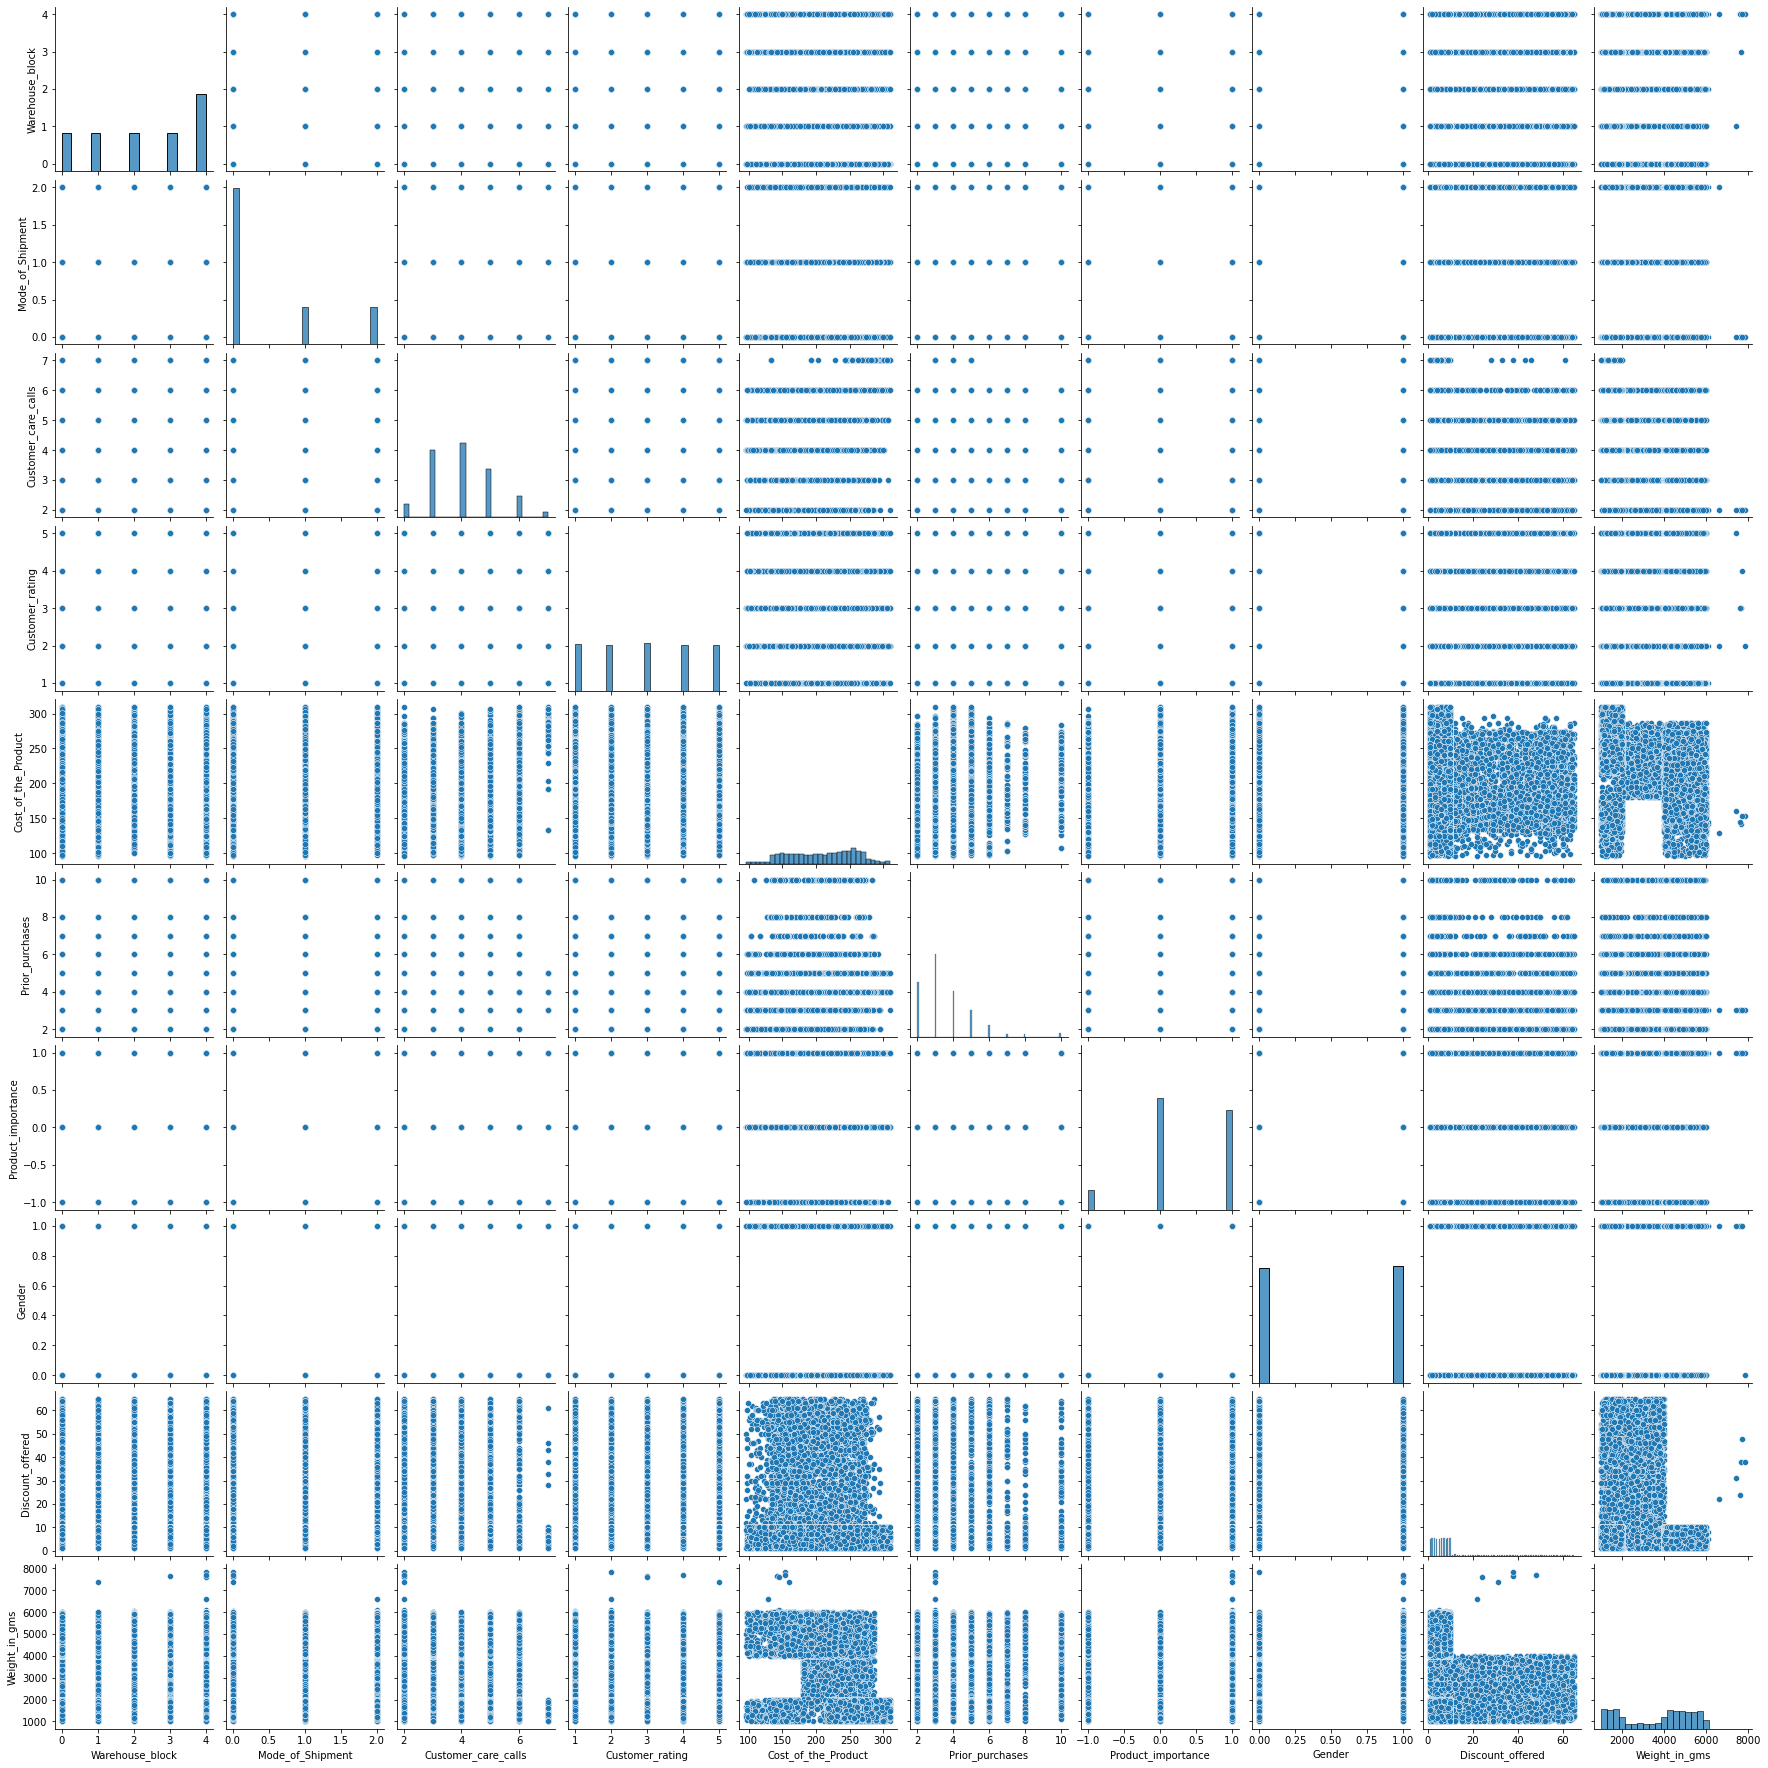

In [18]:
sns.pairplot(data)
plt.show()

[]

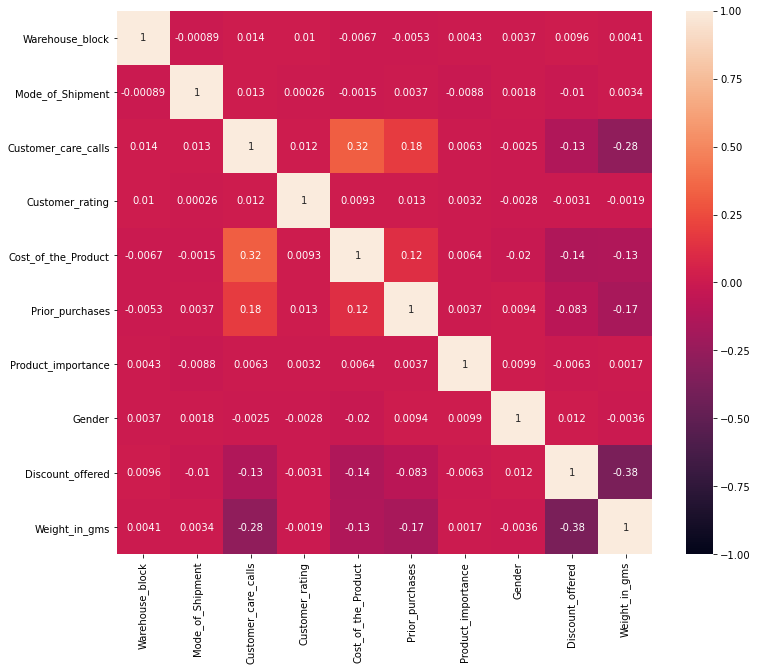

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,vmin=-1)
plt.plot()

## Analisis de diferentes modelos

In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [21]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data,objetivo, test_size=0.2, random_state=42)

In [22]:
# 0 producto ha llegado a tiempo
# 1 producto no ha llegado a tiempo

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 

In [23]:
def metricas(clases_reales, clases_predichas):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    precision = precision_score(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)
    f1 = f1_score(clases_reales, clases_predichas)
    return matriz, accuracy, precision, recall, f1

In [24]:
def visualizar_metricas(clases_reales, clases_predichas, titulo):

    
    #Código para calcular las métricas y matriz de confusión
    matriz, accuracy, precision, recall, f1 = \
                    metricas(clases_reales, clases_predichas)
    
    #Código de matplotlib para graficar 
    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, columns=["0 : LLego a tiempo", "1 : No llego a tiempo"])
    plt.matshow(matriz, cmap="Greens", vmin=0, vmax=10, fignum=1)
    plt.title("Predichas")
    plt.ylabel("Reales")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1, fontsize=20)    
    plt.show()
    print("\n" * 10)

print("\n" * 10)


### Clasificacion de arbol de decision (modelo 1)

In [25]:
from sklearn.tree import DecisionTreeClassifier
arbol=DecisionTreeClassifier()
modelo1=GridSearchCV(arbol,param_grid={'max_depth':range(4,13),'criterion':['gini','entropy']})
modelo1.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 13)})

In [26]:
train_pred=modelo1.predict(train_x)
test_pred=modelo1.predict(test_x)

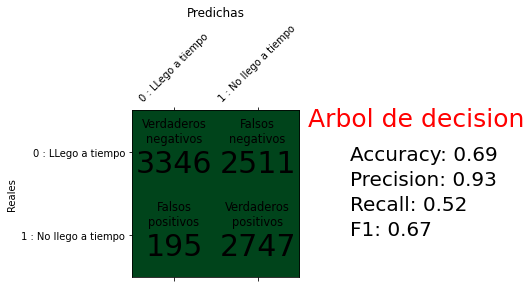

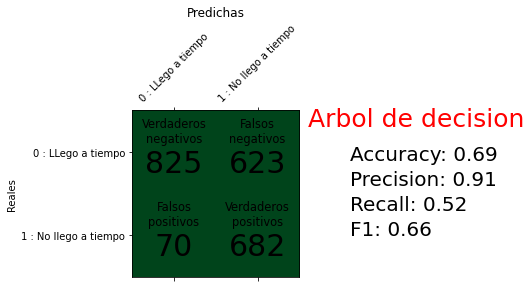

In [27]:
visualizar_metricas(train_y,train_pred, "Arbol de decision")
visualizar_metricas(test_y,test_pred, "Arbol de decision")

### Clasificacion por bosques aleatorios(modelo 2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=42)
modelo2=GridSearchCV(RFC,param_grid={'max_depth':range(4,13),'criterion':['gini','entropy']})
modelo2.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 13)})

In [29]:
train_pred=modelo2.predict(train_x)
test_pred=modelo2.predict(test_x)

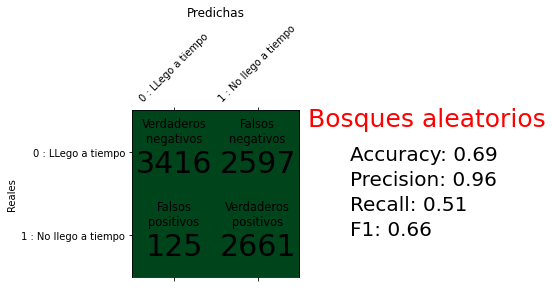

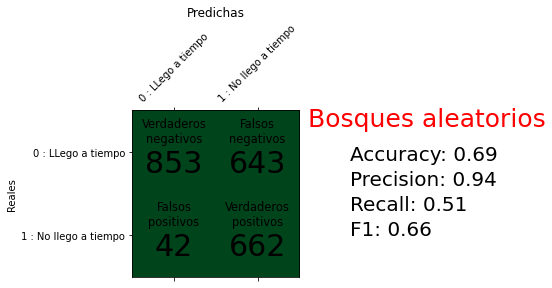

In [30]:
visualizar_metricas(train_y,train_pred, "Bosques aleatorios")
visualizar_metricas(test_y,test_pred, "Bosques aleatorios")

### Clasificacion por vecinos Cercanos (modelo 3)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
modelo3=GridSearchCV(estimator=KNN,param_grid={'n_neighbors':range(5,12)})
modelo3.fit(train_x,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 12)})

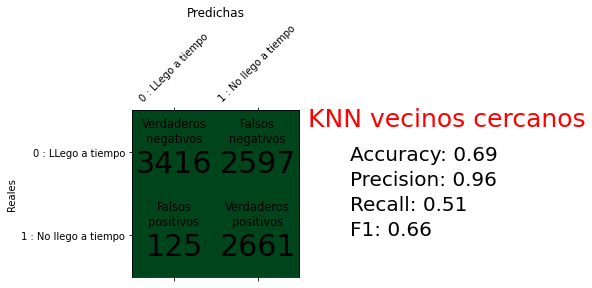

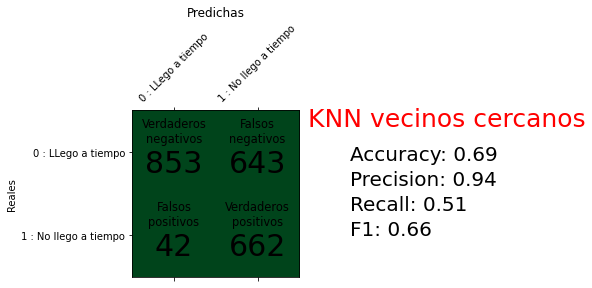

In [32]:
visualizar_metricas(train_y,train_pred, "KNN vecinos cercanos")
visualizar_metricas(test_y,test_pred, "KNN vecinos cercanos")

### Conclusión:  Todos los algoritmos funcionan bastante bien. Con la precisión de prueba más alta de alrededor del 69%. Si buscamos el mejor, Bosques aleatorios puede ser el modelo preferido en este analisis para el conjunto de datos proporcionado.